#**Tesseract OCR Tutorial**
##Episode 01: Extract text from image using Tesseract OCR checkedpoints
- This epiosde covers:
  - Install Tesseract
  - Best Multi-lingaul checkpoints
  - Extract text from image using command-line.
  - Improve the model's output accurecy.
  - Using Python wrapper (pytesseract).
  - Detect text from multilingaul image.

###(1) Introduction
- Tesseract is a multilingaul model which covers ~124 languages.
- Recent version of Tesseract is trained on Nural Network with LSTM (prefer to use v4 and later) 
- Tesseract command-line supports two use two diffrent training methor using the hyperparamter **--oem 1** for LSTM, and **--oem 1** for Legacy Tesseract (old version).
- Information about command line could be found on https://tesseract-ocr.github.io/tessdoc/Command-Line-Usage.html 
- Best multilingual checkpoints could be found on https://github.com/tesseract-ocr/tessdata_best 
- More infroamtion form training could be found on https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/33418.pdf 

###(2) Install Tesseract

In [ ]:
!sudo apt-get install tesseract-ocr

###(3) Download best checkpoints


In [4]:
# Download the best checkpoint from Tesseract github
!git clone https://github.com/tesseract-ocr/tessdata_best.git

Cloning into 'tessdata_best'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 254 (delta 0), reused 2 (delta 0), pack-reused 250
Receiving objects: 100% (254/254), 1.30 GiB | 27.24 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Checking out files: 100% (167/167), done.


In [41]:
!ls /content/tessdata_best/*.traineddata | wc -l

124


###(4)Extract text from image using commandline

In [42]:
#This a function that helps you to show the image on your notebook
from matplotlib import pyplot as plt
from PIL import Image
def show_image(img):
    im=Image.open(img)
    print(im.width, im.height, im.mode, im.format, type(im))
    return im

985 1039 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


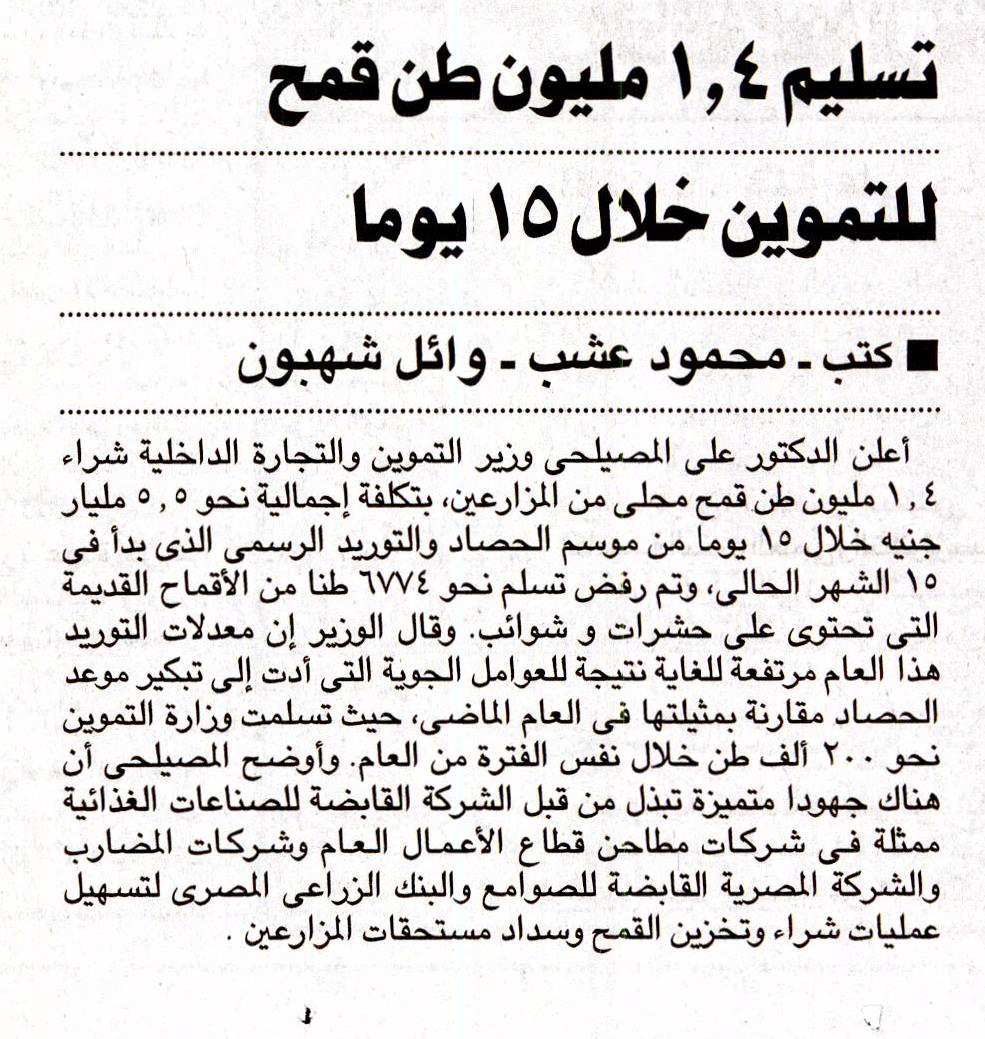

In [16]:
image="/content/2018-05-01_1b00f136-cbff-4af1-a82e-88af2bb721320.jpg"
show_image(image)

**Important paramaters**
- Use --oem 1 for LSTM, --oem 0 for Legacy Tesseract. default value is LSTM (0) from version 3 and 4
- psm (page segmentaion mode) more details could be found on https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/ 
```bash
  pagesegmode values are:
  0 = Orientation and script detection (OSD) only.
  1 = Automatic page segmentation with OSD.
  2 = Automatic page segmentation, but no OSD, or OCR
  3 = Fully automatic page segmentation, but no OSD. (Default)
  4 = Assume a single column of text of variable sizes.
  5 = Assume a single uniform block of vertically aligned text.
  6 = Assume a single uniform block of text.
  7 = Treat the image as a single text line.
  8 = Treat the image as a single word.
  9 = Treat the image as a single word in a circle.
  10 = Treat the image as a single character.
```

In [44]:
output_text=image[:-4]
!tesseract --tessdata-dir /content/tessdata_best $image $output_text -l ara --psm 3

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Detected 103 diacritics


In [46]:
open(output_text+".txt","r").read().splitlines()

['ل : د عشب وائل شهبون',
 '',
 'أعلن الدكتور على :المصيلحى وزير التموين والتجارة الداخلية شراء',
 '٠ مليون طن قمج مجلى من المزارعين, بتكلفة إجمالية نحو 8,9 مليان',
 'جنيه خلال و يوما من موسم الحصاد والتوريد الرسمى الذى بدأ فى',
 '9 ١ الشهر الحالى, ؛ وتم رفض تسلم نحو 1/6 طنا من الأقماح القديمة',
 'التى ت تحتوى على حشرات © شوائب. وقال الوزير إن معدلات التوريد',
 'هذا العام مرتفعة للغاية نتيجة للعوامل الجوية التى أدت إلى تبكير موعد',
 'الحصاد مقارنة بمثيلتها فى العام الماضى, حيث تسلمت وزارة التموين',
 '٠ ألف طن خلال نفس الهترة من العام. وأوضح المصيلحى أن',
 'هناك . جهودا متميزة تبذل من قبل الشركة القابضة للصناعات الغذائية',
 'ممثلة فى شركات مطاحن قطاع:الأعمال العام وشركات الضارب',
 'عمليا ات شرا ع وتخزين القمح وسد اد مستحقات المزا رعين .',
 '',
 'نّْ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '']

###(5) Improve the model's output accurecy.

**Method1: clean the image and convert it to white and black; find best rotation angle**



In [32]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter
#Find best rotation angle
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
#clean the image and convert it to white and black image
def image_cleaner(input_file):
  # input_file = sys.argv[1]
  img = im.open(input_file)
  # convert to binary
  wd, ht = img.size
  pix = np.array(img.convert('1').getdata(), np.uint8)
  bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
  # plt.imshow(bin_img, cmap='gray')
  # plt.savefig('binary.png')
  
  delta = 1
  limit = 5
  angles = np.arange(-limit, limit+delta, delta)
  scores = []
  for angle in angles:
      hist, score = find_score(bin_img, angle)
      scores.append(score)
  best_score = max(scores)
  best_angle = angles[scores.index(best_score)]
  print('Best angle:', best_angle)
  # correct skew
  data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
  img = im.fromarray((255 * data).astype("uint8")).convert("RGB")
  img.save(input_file[:-3]+'png', dpi=(300, 300))


In [33]:
image_cleaner(image)

Best angle: 0


985 1039 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


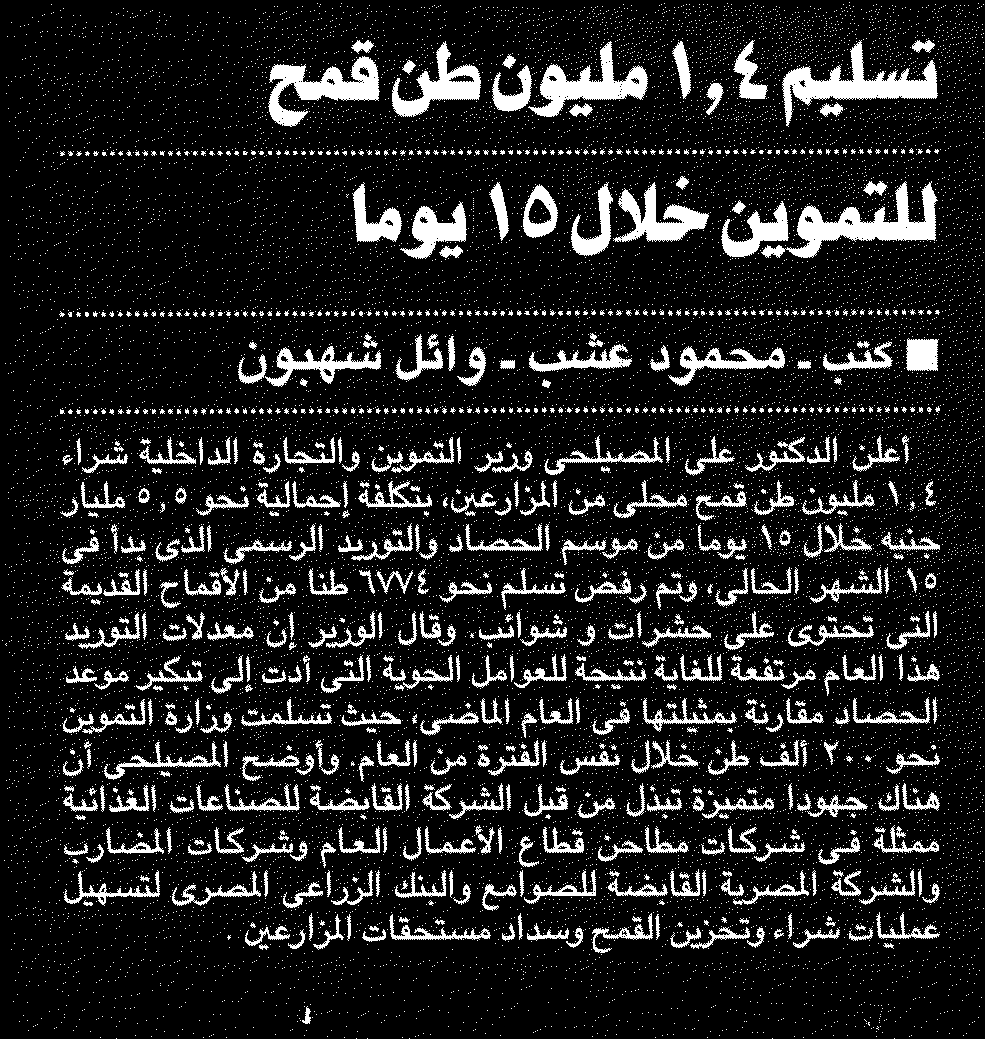

In [34]:
enhanced_image="/content/2018-05-01_1b00f136-cbff-4af1-a82e-88af2bb721320.png"
show_image(enhanced_image)

In [47]:
output_text=image[:-4]
!tesseract --tessdata-dir /content/tessdata_best $enhanced_image $output_text -l ara --psm 3

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica


In [48]:
open(output_text+".txt","r").read().splitlines()

['تسليم 4,١ مليون طن قمح',
 'للتموين خلال ١١ يوما',
 '',
 'ما كتب \u200f محمود عشب وائل شهبون',
 '',
 'أعلن الدكتور على امصيلحى وزير التموين والتجارة الداخلية شراء',
 '4٠ مليون طن قمح محلى من المزارعين, بتكلفة إجمالية نحو 9 , 9 مليار',
 'جنيه خلال 9٠١ يوما من موسم الحصاد والتوريد الرسمى الذى بدأ فى',
 '٠ الشهر الحالى؛ وتم رفض تسلم نحو 17/8 طنا من الأقماح القديمة',
 'التى تحتوى على حشرات و شوائب. وقال الوزير إن معدلات التوريد',
 'هذا العام مرتفعة للغاية نتيجة للعوامل الجوية التى أدت إلى تبكير موعد',
 'الحصاد مقارنة بمثيلتها فى العام الماضى, حيث تسلمت وزارة التموين',
 'نحو 0٠٠7 ألف طن خلال نفس الفترة من العام. وأوضح المصيلحى أن',
 'هناك جهودا متميزة تبذل من قبل الشركة القابضة للصناعات الغذائية',
 'ممثلة فى شركات مطاحن قطاع الأعمال العام وشركات المضارب',
 'والشركة المصرية القابضة للصوامع والبنك الزراعى المصرى لتسهيل',
 'عمليا تِ شرا ع وتخزين القمح وسد اد مستحقات | لمزا رعين .',
 '',
 '1',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '']

**Method2: enhance the iamge quality using Open CV library and change dpi to 600**


In [37]:
import glob, os
import cv2
import numpy as np
from PIL import Image
def enhance_image(f):
  print (f)
  # os.system("python clean_image.py "+f)
  image = cv2.imread(f)
  # g = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  # # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # print (g.shape) 
  # cv2.imshow('Gray image', gray)
  image = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((1, 1), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)
  image = cv2.erode(image, kernel, iterations=1)
  cv2.threshold(cv2.GaussianBlur(image, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  # cv2.threshold(cv2.bilateralFilter(image, 5, 75, 75), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  # cv2.threshold(cv2.medianBlur(image, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  cv2.adaptiveThreshold(cv2.GaussianBlur(image, (5, 5), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
  # cv2.adaptiveThreshold(cv2.bilateralFilter(image, 9, 75, 75), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
  # cv2.adaptiveThreshold(cv2.medianBlur(image, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)  
  RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  PILimage = Image.fromarray(RGBimage)
  PILimage.save(f[:-4]+'_enhanced_600dpi.png',dpi=(600, 600))

In [38]:
enhance_image(image)

/content/2018-05-01_1b00f136-cbff-4af1-a82e-88af2bb721320.jpg


In [39]:
enhanced_image="/content/2018-05-01_1b00f136-cbff-4af1-a82e-88af2bb721320_enhanced_600dpi.png"

In [49]:
output_text=image[:-4]
!tesseract --tessdata-dir /content/tessdata_best $enhanced_image $output_text -l ara --psm 3
open(output_text+".txt","r").read().splitlines()

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica


['تسليم 4,١ مليون طن قمح',
 'للتموين خلال ١١ يوما',
 '',
 'ما كتب \u200f محمود عشب وائل شهبون',
 '',
 'أعلن الدكتور على امصيلحى وزير التموين والتجارة الداخلية شراء',
 '4٠ مليون طن قمح محلى من المزارعين, بتكلفة إجمالية نحو 9 , 9 مليار',
 'جنيه خلال 9٠١ يوما من موسم الحصاد والتوريد الرسمى الذى بدأ فى',
 '٠ الشهر الحالى؛ وتم رفض تسلم نحو 17/8 طنا من الأقماح القديمة',
 'التى تحتوى على حشرات و شوائب. وقال الوزير إن معدلات التوريد',
 'هذا العام مرتفعة للغاية نتيجة للعوامل الجوية التى أدت إلى تبكير موعد',
 'الحصاد مقارنة بمثيلتها فى العام الماضى, حيث تسلمت وزارة التموين',
 'نحو 0٠٠7 ألف طن خلال نفس الفترة من العام. وأوضح المصيلحى أن',
 'هناك جهودا متميزة تبذل من قبل الشركة القابضة للصناعات الغذائية',
 'ممثلة فى شركات مطاحن قطاع الأعمال العام وشركات المضارب',
 'والشركة المصرية القابضة للصوامع والبنك الزراعى المصرى لتسهيل',
 'عمليا تِ شرا ع وتخزين القمح وسد اد مستحقات | لمزا رعين .',
 '',
 '1',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '']

###(5)Using Python wrapper (pytesseract)
- More details about the wrapper could be found on https://pypi.org/project/pytesseract/


In [1]:
!pip install pytesseract

**Parameters**

`image_to_data(image, lang=None, config='', nice=0, output_type=Output.STRING, timeout=0, pandas_config=None)`



1.   `image` Object or String - PIL Image/NumPy array or file path of the image to be processed by Tesseract. If you pass object instead of file path, pytesseract will implicitly convert the image to RGB mode.
2.   `lang` String - Tesseract language code string. Defaults to eng if not specified! Example for multiple languages: lang='eng+fra'
2.  `config` String - Any additional custom configuration flags that are not available via the pytesseract function. For example: config='--psm 6'
2.  `nice` Integer - modifies the processor priority for the Tesseract run. Not supported on Windows. Nice adjusts the niceness of unix-like processes.
2.  `output_type` Class attribute - specifies the type of the output, defaults to string. For the full list of all supported types, please check the definition of pytesseract.Output class.
2.  `timeout` Integer or Float - duration in seconds for the OCR processing, after which, pytesseract will terminate and raise RuntimeError.
2.  `pandas_config` Dict - only for the Output.DATAFRAME type. Dictionary with custom arguments for pandas.read_csv. Allows you to customize the output of image_to_data. 



In [2]:
import pytesseract

In [4]:
tessdata_dir_config = r'--tessdata-dir "/content/tessdata_best"'
enhanced_image="/content/2018-05-01_1b00f136-cbff-4af1-a82e-88af2bb721320_enhanced_600dpi.png"
text = pytesseract.image_to_string(enhanced_image, lang='ara', config=tessdata_dir_config)
print (text)

تسليم 4,١ مليون طن قمح
للتموين خلال ١١ يوما

ما كتب ‏ محمود عشب وائل شهبون

أعلن الدكتور على امصيلحى وزير التموين والتجارة الداخلية شراء
4٠ مليون طن قمح محلى من المزارعين, بتكلفة إجمالية نحو 9 , 9 مليار
جنيه خلال 9٠١ يوما من موسم الحصاد والتوريد الرسمى الذى بدأ فى
٠ الشهر الحالى؛ وتم رفض تسلم نحو 17/8 طنا من الأقماح القديمة
التى تحتوى على حشرات و شوائب. وقال الوزير إن معدلات التوريد
هذا العام مرتفعة للغاية نتيجة للعوامل الجوية التى أدت إلى تبكير موعد
الحصاد مقارنة بمثيلتها فى العام الماضى, حيث تسلمت وزارة التموين
نحو 0٠٠7 ألف طن خلال نفس الفترة من العام. وأوضح المصيلحى أن
هناك جهودا متميزة تبذل من قبل الشركة القابضة للصناعات الغذائية
ممثلة فى شركات مطاحن قطاع الأعمال العام وشركات المضارب
والشركة المصرية القابضة للصوامع والبنك الزراعى المصرى لتسهيل
عمليا تِ شرا ع وتخزين القمح وسد اد مستحقات | لمزا رعين .

1

 

 

 



###(6) Detect text from multilingaul image
To extract text from multilingaul image, however, Tesseract have one model for each language, you just merge the model by + operator. For example if you have a image that has English and Arabic you can set the language parameter as eng+ara. Note: the order of langageu is does not matter.